In [85]:
print(gensim.__version__)

3.5.0


In [1]:
import gensim
import spacy
import pandas as pd
import smart_open
import random
import sqlite3
import logging
nlp = spacy.load('en', parser=False)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frame

In [18]:
import os

# Folder containing all NIPS papers.
data_dir = './TXTS'

# Read all texts into a list.
titles = []
docs = []
files = os.listdir(data_dir)
for filen in files:
    if not filen.startswith('.'):
        with open(data_dir + '/' + filen, errors='ignore') as fid:
            txt = fid.read().replace('\n', '')
        docs.append(txt)
        titles.append(filen)

In [79]:
docs

['  Burlington Primitive: Non-European Art in the Burlington Magazine before 1930Author(s): Colin RhodesSource: The Burlington Magazine, Vol. 146, No. 1211 (Feb., 2004), pp. 98-104Published by: Burlington Magazine Publications Ltd.Stable URL: https://www.jstor.org/stable/20073399Accessed: 15-08-2018 19:11 UTC JSTOR is a not-for-profit service that helps scholars, researchers, and students discover, use, and build upon a widerange of content in a trusted digital archive. We use information technology and tools to increase productivity andfacilitate new forms of scholarship. For more information about JSTOR, please contact support@jstor.org. Your use of the JSTOR archive indicates your acceptance of the Terms & Conditions of Use, available athttps://about.jstor.org/terms\x0c BurUngton primitive: non-European art in The BurUngton Magazine before 1930 by COLIN RHODES, Loughborough University by COLIN RHODES, Loughborough University HIDDEN IN THE ADVERTISING pages of the first issue of THE 

In [23]:
doc_text = pd.DataFrame({"text": docs})
doc_text

,text
0,Burlington Primitive: Non-European Art in th...
1,Correction: Charles of Lorraine's Audience C...
2,'A More and More Important Work': Roger Fry ...
3,"Holmes, Fry, Jaccaci and the 'Art in America..."
4,THE SECOND NUMBER OF THE BURLINGTON MAGAZINE...
5,A Retrospect of 1909Source: The Burlington M...
6,'The Burlington Magazine' and the Wax Bust C...
7,Dr. Bode and 'The Burlington Magazine'Author...
8,Signor Virzi's PictureAuthor(s): Dan Fellows...
9,"The Burlington Magazine Monograph on ""Chines..."


In [128]:
from nltk.tokenize import sent_tokenize
sents = []
for i in range(len(doc_text)):
    lines = sent_tokenize(doc_text.text[i])
    sents.append(lines[i])

In [130]:
sents[0]

'i'

In [ ]:
titles = []

In [107]:
titles.append(doc_text.text[i][0])

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ']

In [89]:
doc_titles = pd.DataFrame({"titles": titles})
doc_titles 

ValueError: If using all scalar values, you must pass an index

In [26]:
dataframe = pd.concat([doc_text,doc_titles], axis=1)
dataframe

,text,titles
0,Burlington Primitive: Non-European Art in th...,20073399.txt
1,Correction: Charles of Lorraine's Audience C...,20074110.txt
2,'A More and More Important Work': Roger Fry ...,3100631.txt
3,"Holmes, Fry, Jaccaci and the 'Art in America...",3100632.txt
4,THE SECOND NUMBER OF THE BURLINGTON MAGAZINE...,43470652.txt
5,A Retrospect of 1909Source: The Burlington M...,858018.txt
6,'The Burlington Magazine' and the Wax Bust C...,858331.txt
7,Dr. Bode and 'The Burlington Magazine'Author...,858395.txt
8,Signor Virzi's PictureAuthor(s): Dan Fellows...,858670.txt
9,"The Burlington Magazine Monograph on ""Chines...",862450.txt


In [27]:
def read_corpus(documents):
    for i, text in enumerate(documents):
        yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(text), [dataframe.titles[i]])

In [28]:
train_corpus = list(read_corpus(dataframe.text))

In [29]:
train_corpus[:3]

[TaggedDocument(words=['burlington', 'primitive', 'non', 'european', 'art', 'in', 'the', 'burlington', 'magazine', 'before', 'author', 'colin', 'rhodessource', 'the', 'burlington', 'magazine', 'vol', 'no', 'feb', 'pp', 'published', 'by', 'burlington', 'magazine', 'publications', 'ltd', 'stable', 'url', 'https', 'www', 'jstor', 'org', 'stable', 'accessed', 'utc', 'jstor', 'is', 'not', 'for', 'profit', 'service', 'that', 'helps', 'scholars', 'researchers', 'and', 'students', 'discover', 'use', 'and', 'build', 'upon', 'widerange', 'of', 'content', 'in', 'trusted', 'digital', 'archive', 'we', 'use', 'information', 'technology', 'and', 'tools', 'to', 'increase', 'productivity', 'andfacilitate', 'new', 'forms', 'of', 'scholarship', 'for', 'more', 'information', 'about', 'jstor', 'please', 'contact', 'support', 'jstor', 'org', 'your', 'use', 'of', 'the', 'jstor', 'archive', 'indicates', 'your', 'acceptance', 'of', 'the', 'terms', 'conditions', 'of', 'use', 'available', 'athttps', 'about', 'js

In [30]:
model = gensim.models.doc2vec.Doc2Vec(size=50, min_count=2, iter=55)
model.build_vocab(train_corpus)
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.iter)

/usr/local/lib/python3.7/site-packages/gensim/models/doc2vec.py:531: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.7/site-packages/gensim/models/doc2vec.py:535: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2018-08-15 15:50:15,462 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-08-15 15:50:15,463 : INFO : collecting all words and their counts
2018-08-15 15:50:15,463 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-08-15 15:50:15,475 : INFO : collected 8543 word types and 20 unique tags from a corpus of 20 examples and 54074 words
2018-08-15 15:50:15,475 : INFO : Loading a fres

2018-08-15 15:50:16,056 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 15:50:16,057 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 15:50:16,058 : INFO : EPOCH - 16 : training on 54074 raw words (35713 effective words) took 0.0s, 1431780 effective words/s
2018-08-15 15:50:16,086 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 15:50:16,087 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 15:50:16,087 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 15:50:16,089 : INFO : EPOCH - 17 : training on 54074 raw words (35784 effective words) took 0.0s, 1240393 effective words/s
2018-08-15 15:50:16,113 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 15:50:16,114 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 15:50:16,115 : INFO : worker thread finished; awaiting finish of 0 more threads
20

2018-08-15 15:50:16,673 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 15:50:16,674 : INFO : EPOCH - 36 : training on 54074 raw words (35870 effective words) took 0.0s, 1350111 effective words/s
2018-08-15 15:50:16,699 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 15:50:16,700 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 15:50:16,700 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 15:50:16,701 : INFO : EPOCH - 37 : training on 54074 raw words (35924 effective words) took 0.0s, 1539878 effective words/s
2018-08-15 15:50:16,731 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-08-15 15:50:16,732 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-08-15 15:50:16,733 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-08-15 15:50:16,733 : INFO : EPOCH - 38 : training on 54074 raw words (35850 effective wo

CPU times: user 3.71 s, sys: 161 ms, total: 3.87 s
Wall time: 1.69 s


In [34]:
from pprint import pprint
pprint(model.docvecs.most_similar(positive=["882580.txt"], topn=10))

[('875155.txt', 0.37253037095069885),
 ('858331.txt', 0.34227868914604187),
 ('880051.txt', 0.2958128750324249),
 ('20074110.txt', 0.2946563959121704),
 ('43470652.txt', 0.2551175057888031),
 ('868127.txt', 0.2518046796321869),
 ('3100631.txt', 0.24079051613807678),
 ('869764.txt', 0.23745597898960114),
 ('862450.txt', 0.19421535730361938),
 ('858670.txt', 0.15627127885818481)]


/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [70]:
model.save_word2vec_format('doc_tensor_wedland_documents.w2v', doctag_vec=True, word_vec=False)

2018-08-15 16:03:23,591 : INFO : storing 20x50 projection weights into doc_tensor_wedland_documents.w2v


In [71]:
model.save('doc_tensor_wedland_documents.doc2vec')

2018-08-15 16:03:28,502 : INFO : saving Doc2Vec object under doc_tensor_wedland_documents.doc2vec, separately None
2018-08-15 16:03:28,536 : INFO : saved doc_tensor_wedland_documents.doc2vec


In [35]:
import spacy
from spacy import displacy
from spacy.pipeline import EntityRecognizer

In [69]:
doc_raw = dataframe['text'][0]
doc2 = nlp(doc_raw)
displacy.render(doc2, style='ent', jupyter=True)

In [38]:
dataframe['entities'] = dataframe['text'].apply(lambda x: list(nlp(x).ents))

In [39]:
dataframe

,text,titles,entities
0,Burlington Primitive: Non-European Art in th...,20073399.txt,"[(Burlington, Primitive), (Non, -), (the, Burl..."
1,Correction: Charles of Lorraine's Audience C...,20074110.txt,"[(Lorraine), (Audience, Chamber), (BrusselsSou..."
2,'A More and More Important Work': Roger Fry ...,3100631.txt,"[(Roger, Fry), (The, Burlington, Magazine, ,, ..."
3,"Holmes, Fry, Jaccaci and the 'Art in America...",3100632.txt,"[( , Holmes, ,, Fry), (Jaccaci), (the, ', Art..."
4,THE SECOND NUMBER OF THE BURLINGTON MAGAZINE...,43470652.txt,"[(THE, BURLINGTON, MAGAZINE), (The, Burlington..."
5,A Retrospect of 1909Source: The Burlington M...,858018.txt,"[( , A, Retrospect, of, 1909Source), (The, Bu..."
6,'The Burlington Magazine' and the Wax Bust C...,858331.txt,"[(The, Burlington, Magazine, '), (the, Wax, Bu..."
7,Dr. Bode and 'The Burlington Magazine'Author...,858395.txt,"[(Bode), (', The, Burlington, Magazine'Author(..."
8,Signor Virzi's PictureAuthor(s): Dan Fellows...,858670.txt,"[( , Signor, Virzi, 's), (Dan, Fellows, Platt..."
9,"The Burlington Magazine Monograph on ""Chines...",862450.txt,"[( , The, Burlington, Magazine, Monograph), (..."


In [40]:
from sklearn.cluster import KMeans

In [41]:
df = pd.DataFrame()

In [42]:
doc_vectors = model.docvecs.doctag_syn0

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


In [56]:
num_clusters = 10

In [57]:
kmeans_clustering = KMeans( n_clusters = num_clusters )

In [58]:
idx = kmeans_clustering.fit_predict( doc_vectors )

In [59]:
d = []
word_centroid_list = list(zip(model.docvecs.offset2doctag, idx))
word_centroid_list_sort = sorted(word_centroid_list, key=lambda el: el[1], reverse=False)
for word_centroid in word_centroid_list_sort:
    line = word_centroid[0] + '\t' + str(word_centroid[1]) + '\n'
    print(line)
    d.append({'author': word_centroid[0], 'category': word_centroid[1]})

3100631.txt	0

858018.txt	1

858331.txt	1

858395.txt	1

865978.txt	1

868127.txt	1

869764.txt	1

875155.txt	1

880051.txt	1

881276.txt	2

43470652.txt	3

20074110.txt	4

858670.txt	4

862450.txt	4

877568.txt	4

3100632.txt	5

882580.txt	6

20073399.txt	7

878800.txt	8

875666.txt	9



In [60]:
df = pd.DataFrame(d)
df.groupby(['category']).count()

,author
category,
0,1
1,8
2,1
3,1
4,4
5,1
6,1
7,1
8,1


In [61]:
%matplotlib inline

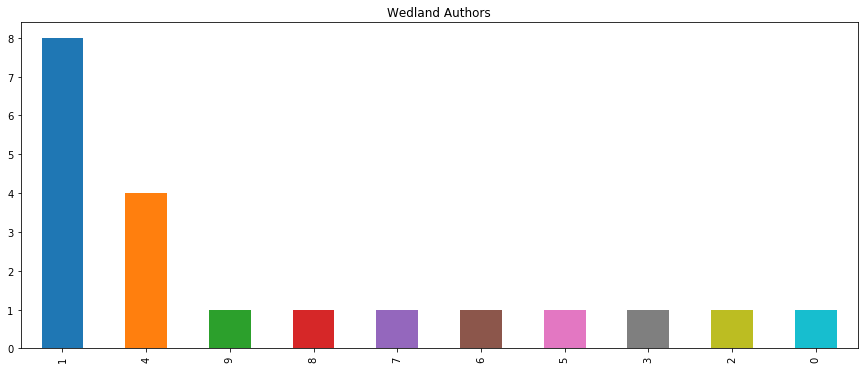

In [62]:
 df['category'].value_counts().head(10).plot(title="Wedland Authors", kind='bar', figsize=(15,6))

In [63]:
inference = []

In [65]:
from pprint import pprint
for i in range(len(dataframe)):
    sim = model.docvecs.most_similar(positive=[dataframe['titles'][i]], topn=1)
    print("{}: {}, {}".format(dataframe['titles'][i], sim[0][0], sim[0][1]))
    inference.append({'_original': dataframe['titles'][i], 'closest historian': sim[0][0], 'cosine': sim[0][1]})

20073399.txt: 880051.txt, 0.435153990983963
20074110.txt: 858670.txt, 0.4529879093170166
3100631.txt: 875155.txt, 0.5174976587295532
3100632.txt: 858331.txt, 0.3799404799938202
43470652.txt: 868127.txt, 0.5512089729309082
858018.txt: 858331.txt, 0.6992567181587219
858331.txt: 858395.txt, 0.7040016651153564
858395.txt: 858331.txt, 0.7040017247200012
858670.txt: 862450.txt, 0.5402573943138123
862450.txt: 858670.txt, 0.5402573347091675
865978.txt: 875155.txt, 0.5439879298210144
868127.txt: 869764.txt, 0.7055346965789795
869764.txt: 868127.txt, 0.7055347561836243
875155.txt: 880051.txt, 0.5459263324737549
875666.txt: 878800.txt, 0.4157261252403259
877568.txt: 858670.txt, 0.5342541337013245
878800.txt: 877568.txt, 0.4258922040462494
880051.txt: 875155.txt, 0.5459262728691101
881276.txt: 862450.txt, 0.38490819931030273
882580.txt: 875155.txt, 0.37253037095069885


/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [66]:
trial = pd.DataFrame(inference)

In [67]:
trial_sorted = trial.sort_values(by=['cosine'], ascending=False)

In [68]:
trial_sorted.head(322)

,_original,closest historian,cosine
12,869764.txt,868127.txt,0.705535
11,868127.txt,869764.txt,0.705535
7,858395.txt,858331.txt,0.704002
6,858331.txt,858395.txt,0.704002
5,858018.txt,858331.txt,0.699257
4,43470652.txt,868127.txt,0.551209
13,875155.txt,880051.txt,0.545926
17,880051.txt,875155.txt,0.545926
10,865978.txt,875155.txt,0.543988
8,858670.txt,862450.txt,0.540257


In [72]:
%run ./word2vec2tensor2.py -i doc_tensor_wedland_documents.w2v -o historian

2018-08-15 16:03:38,593 : INFO : running ./word2vec2tensor2.py -i doc_tensor_wedland_documents.w2v -o historian
2018-08-15 16:03:38,595 : INFO : loading projection weights from doc_tensor_wedland_documents.w2v
2018-08-15 16:03:38,597 : INFO : loaded (20, 50) matrix from doc_tensor_wedland_documents.w2v
2018-08-15 16:03:38,599 : INFO : 2D tensor file saved to historian_tensor.tsv
2018-08-15 16:03:38,600 : INFO : Tensor metadata file saved to historian_metadata.tsv
2018-08-15 16:03:38,601 : INFO : finished running word2vec2tensor2.py


<Figure size 432x288 with 0 Axes>

In [75]:
with open('historian_metadata.tsv','w') as w:
    w.write('artist\id\n')
    for i,j in zip(dataframe.titles, dataframe.entities):
        w.write("%s\t%s\n" % (i,j))